<a href="https://colab.research.google.com/github/aminabyaneh/Machine_Learning/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Classification

In [0]:
#!ipython nbconvert --to html SVM.ipynb  


[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook SVM.ipynb to html
[NbConvertApp] Writing 347954 bytes to SVM.html


## SVM Linear Kernel

In [0]:
# loading digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
print('shape of digits data:', digits.data.shape)
print('shape of digits target:', digits.target.shape)

shape of digits data: (1797, 64)
shape of digits target: (1797,)


shape of data is (542, 64) (542,) 

lable of image is 1


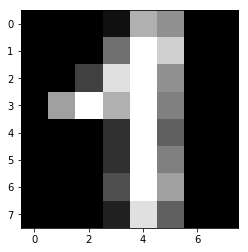

In [0]:
import numpy as np
from cv2 import imshow
from matplotlib import pyplot as plt

index_of_123 = np.where((digits.target == 1 ) | (digits.target == 2) | (digits.target == 3))
X = digits.data[index_of_123]
y = digits.target[index_of_123]
print('shape of data is', X.shape, y.shape, '\n')
plt.imshow(np.reshape(X[11], (8,8)), cmap=plt.cm.gray)
print('lable of image is', y[11])

In [0]:
from IPython.display import clear_output

# Print iterations progress
def progress(iteration, total):
  prog = round((iteration / total) * 50)
  out = prog * '+' + (50 - prog) * '*'
  clear_output()
  print(out)
  # Print New Line on Complete
  if iteration == total: 
      print()

In [0]:
# Import necessary functions
import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create a range for C parameter
c_scores = []
c_values = np.arange(2**(-10), 2**3, 0.001)

# Iterate in all c values
start = time.time()
t = 5
for c, i in zip(c_values, range(1, len(c_values) + 1)):
  
  end = time.time()
  if (end - start > t):
    t += 5
    progress(i, len(c_values))

  # Create a SVC classifier using a linear kernel
  svm = SVC(kernel='linear', C=c, decision_function_shape='ovr')

  # Use a cross validator 
  scores = cross_val_score(svm, X, y, cv=10)
  c_scores.append(scores.mean())

print("Total number of %d c scores is recorded" % (len(c_scores)))

++++++++++++++++++++++++++++++++++++++++++++++++++
Total number of 8000 c scores is recorded


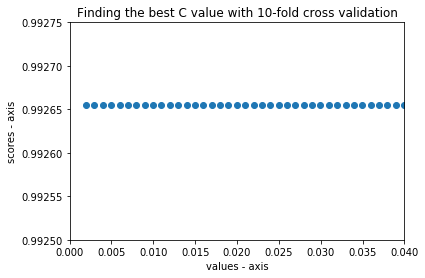

In [0]:
# Importing the required module 
import matplotlib.pyplot as plt 
  
# Plotting the points  
plt.scatter(c_values, c_scores) 
  
# Naming the x axis 
plt.xlabel('values - axis') 
# Naming the y axis 
plt.ylabel('scores - axis') 

# Set axis
plt.axis([0, 0.04, 0.99250, 0.99275])

# Giving a title to my graph 
plt.title('Finding the best C value with 10-fold cross validation') 
  
# Function to show the plot 
plt.show() 

In [0]:
print('Best C value is:')
print(c_values[np.argmax(np.asarray(c_scores))])

Best C value is:
0.0019765625


In [0]:
# Create a SVC classifier using a linear kernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm = SVC(kernel='linear', C=0.0019765625, decision_function_shape='ovr')
svm.fit(X=X_train, y=y_train)

print('Accuracy on train data is', accuracy_score(svm.predict(X=X_train), y_train))
print('Accuracy on test data is', accuracy_score(svm.predict(X=X_test), y_test))
s = svm.support_
print('Support vectors are:')
print(s)

Accuracy on train data is 0.9976905311778291
Accuracy on test data is 1.0
Support vectors are:
[  0  35  49  59  82  88  95 123 158 168 182 197 212 241 248 271 333 340
 353 362 372   2   6  11  21  30  41  52  84  99 109 115 116 156 161 164
 174 233 285 292 298 320 343 345 348 361 420 421  54  68  69  71  90 101
 179 185 202 211 231 273 276 306 309 363 378 389 411]


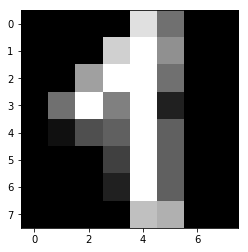

In [0]:
# Plot some support vectors
plt.imshow(np.reshape(X[411], (8,8)), cmap=plt.cm.gray)

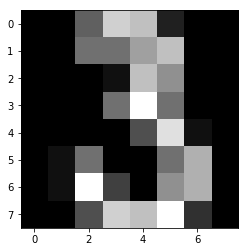

In [0]:
plt.imshow(np.reshape(X[276], (8,8)), cmap=plt.cm.gray)


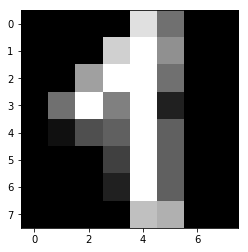

In [0]:
plt.imshow(np.reshape(X[21], (8,8)), cmap=plt.cm.gray)

## SVM RBF Kernel 

In [0]:
# Import necessary functions
import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create a range for C parameter
proposed_gamma_value = 1

g_scores = []
g_values = np.arange(0.01 * proposed_gamma_value, 10 * proposed_gamma_value, 0.1)

# Iterate in all c values
start = time.time()
t = 5
for g, i in zip(g_values, range(1, len(g_values) + 1)):
  
  end = time.time()
  if (end - start > t):
    t += 5
    progress(i, len(g_values))

  # Create a SVC classifier using a linear kernel
  svm = SVC(kernel='rbf', gamma=g, C=0.0019765625)

  # Use a cross validator 
  scores = cross_val_score(svm, X, y, cv=10)
  g_scores.append(scores.mean())

print("Total number of %d g scores is recorded" % (len(c_scores)))

++++++++++++++++++++++++++++++++++++++++++++++****
Total number of 8013 g scores is recorded


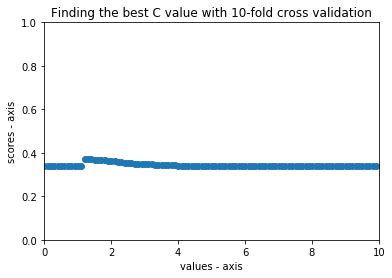

In [0]:
# Plotting the points  
plt.scatter(g_values, g_scores) 
  
# Naming the x axis 
plt.xlabel('values - axis') 
# Naming the y axis 
plt.ylabel('scores - axis') 

# Set axis
plt.axis([0, 10, 0, 1])

# Giving a title to my graph 
plt.title('Finding the best C value with 10-fold cross validation') 
  
# Function to show the plot 
plt.show() 

In [0]:
print('Best G value is:')
print(g_values[np.argmax(np.asarray(g_scores))])

Best G value is:
1.2100000000000002


In [0]:
# Create a SVC classifier using a rbf kernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm = SVC(kernel='linear', gamma=1.2100000000000002, C=0.0019765625)
svm.fit(X=X_train, y=y_train)

print('Accuracy on train data is', accuracy_score(svm.predict(X=X_train), y_train))
print('Accuracy on test data is', accuracy_score(svm.predict(X=X_test), y_test))

Accuracy on train data is 1.0
Accuracy on test data is 0.9908256880733946
